In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load The Data Set

In [27]:
columns = ['user_id','item_id','rating','timestamp']

# Default header = 0 : takes first row as headers

# header = None to omit default behaviour

# name = set column names here explity

df = pd.read_csv('./ml-100k/u.data',sep='\t',names = columns)
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [28]:
# unique users
df.user_id.nunique()

943

In [29]:
df.item_id.nunique()

1682

In [30]:
column_movies = ["movie id" , "movie title" , "release date" , "video release date" , "IMDb URL" , "unknown" , "Action" , "Adventure" ,"Animation", "Children's" , "Comedy" , "Crime" , "Documentary" , "Drama" , "Fantasy","Film-Noir", "Horror", "Musical", "Mystery","Romance", "Sci-Fi", "Thriller","War", "Western"]

# Default header = 0 : takes first row as headers

# header = None to omit default behaviour

# name = set column names here explity

movies = pd.read_csv('./ml-100k/u.item',sep='\|',names = column_movies)
movies.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
movie_title = movies[['movie id','movie title']]
movie_title.columns=['item_id','Title']
movie_title.head()

,item_id,Title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


### Merging two Data Frames into One


In [32]:
df = pd.merge(df,movie_title,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,Title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


### Exploratory Data Analysis

In [48]:
print(df.groupby('Title').mean()['rating'].sort_values(ascending=False))

Title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64


In [65]:
rating = pd.DataFrame(df.groupby('Title').mean()['rating'])
print(rating.head())


                             rating
Title                              
'Til There Was You (1997)  2.333333
1-900 (1994)               2.600000
101 Dalmatians (1996)      2.908257
12 Angry Men (1957)        4.344000
187 (1997)                 3.024390


In [68]:
rating['count'] = pd.DataFrame(df.groupby('Title').count()['rating'])

In [69]:
rating

,rating,count
Title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [73]:
rating.sort_values(by='rating',ascending=False)


,rating,count
Title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


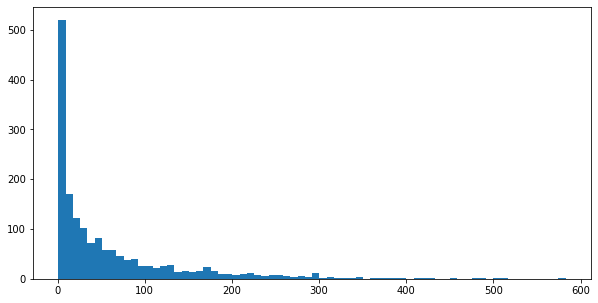

In [79]:
plt.figure(figsize=(10,5))
plt.hist(rating['count'],bins = 70)
plt.show()